# Import Library and Setup Kagle

In [50]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
# Define folder path on Google Drive
folder_path = '/content/drive/MyDrive/Dataset/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# Define dataset path within the folder
dataset_path = folder_path + 'TMDB_movie_dataset_v11.csv'

# Read the dataset
df = pd.read_csv(dataset_path)
df.head(3)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."


# Exploratory Data Analysis (EDA)

In [52]:
# Displays the columns in dataframe
print(df.columns)

# Removing movie that has the "adult" feature TRUE
df = df[df['adult'] != True]

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')


In [53]:
# Selecting column(s) that will be use for the model to work and store it to new variable
movies = df[['title', 'overview', 'genres', 'tagline', 'keywords']]
movies.head(3)

,title,overview,genres,tagline,keywords
0,Inception,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",Your mind is the scene of the crime.,"rescue, mission, dream, airplane, paris, franc..."
1,Interstellar,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",Mankind was born on Earth. It was never meant ...,"rescue, future, spacecraft, race against time,..."
2,The Dark Knight,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",Welcome to a world without rules.,"joker, sadism, chaos, secret identity, crime f..."


In [54]:
# Obtaining overview of dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945749 entries, 0 to 1042778
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   title     945738 non-null  object
 1   overview  772146 non-null  object
 2   genres    636420 non-null  object
 3   tagline   135796 non-null  object
 4   keywords  256052 non-null  object
dtypes: object(5)
memory usage: 43.3+ MB


In [55]:
# Checking numbers of data that have NaN value
missing_values = movies.isna().sum()
print(missing_values)

title           11
overview    173603
genres      309329
tagline     809953
keywords    689697
dtype: int64


In [56]:

# Checking the percentage of missing value a.k.a NaN
missing_percentage = (missing_values / len(movies)) * 100
print("Missing Value Percentage :\n", missing_percentage)

Missing Value Percentage :
 title        0.001163
overview    18.356139
genres      32.707304
tagline     85.641433
keywords    72.926009
dtype: float64


In [57]:
# Checking row(s) that has NaN in it
print(movies[movies.isna().any(axis=1)])

                                                   title  \
107                                        Spirited Away   
110                                           Big Hero 6   
142                                           Black Swan   
183      Birdman or (The Unexpected Virtue of Ignorance)   
225                                       A Star Is Born   
...                                                  ...   
1042774                    Bosko and the Rebirth of Tiki   
1042775                                   Something Love   
1042776                                     Akharin Shab   
1042777                        My Comic Shop DocumentARy   
1042778                                      Dossier 137   

                                                  overview  \
107      A young girl, Chihiro, becomes trapped in a st...   
110      A special bond develops between plus-sized inf...   
142      A journey through the psyche of a young baller...   
183      A fading actor best kn

In [58]:
# Replacing NaN values to empty string
movies = movies.fillna('')

# Checking if there's still NaN values
movies.isna().sum()

title       0
overview    0
genres      0
tagline     0
keywords    0
dtype: int64

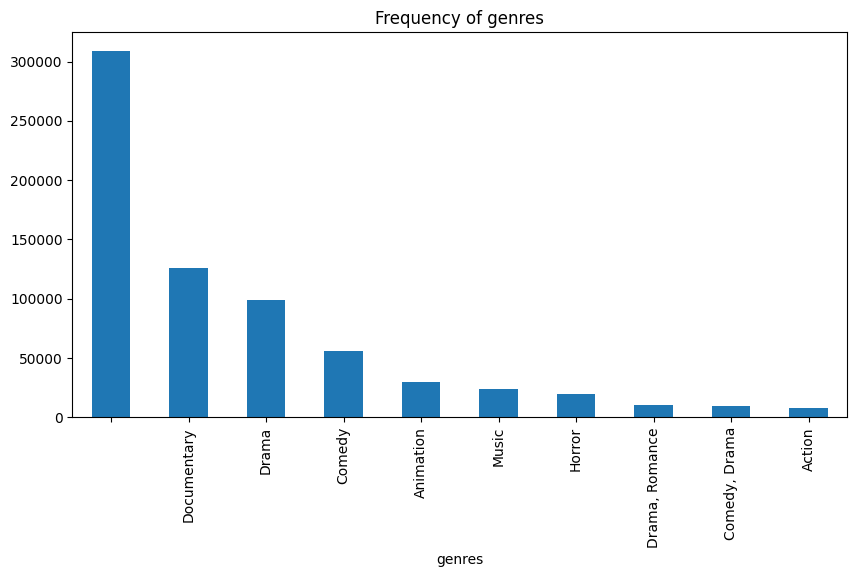

In [59]:
# Plotting the frequency of categories on top 10 "genres" feature
categorical_features = ['genres']

for feature in categorical_features:
  plt.figure(figsize=(10, 5))
  movies[feature].value_counts().head(10).plot(kind='bar')
  plt.title(f"Frequency of {feature}")
  plt.show


overview - Word Count Statistics:
count    945749.000000
mean         36.898279
std          35.928050
min           0.000000
25%           9.000000
50%          28.000000
75%          55.000000
max         226.000000
Name: overview, dtype: float64


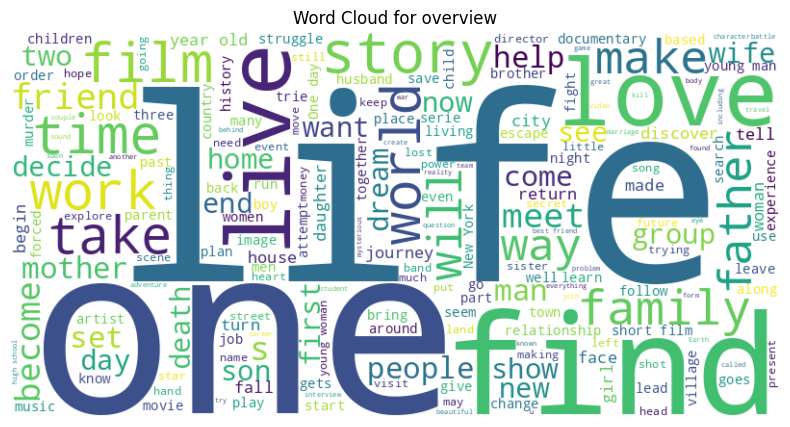


tagline - Word Count Statistics:
count    945749.000000
mean          1.163100
std           3.568881
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          53.000000
Name: tagline, dtype: float64


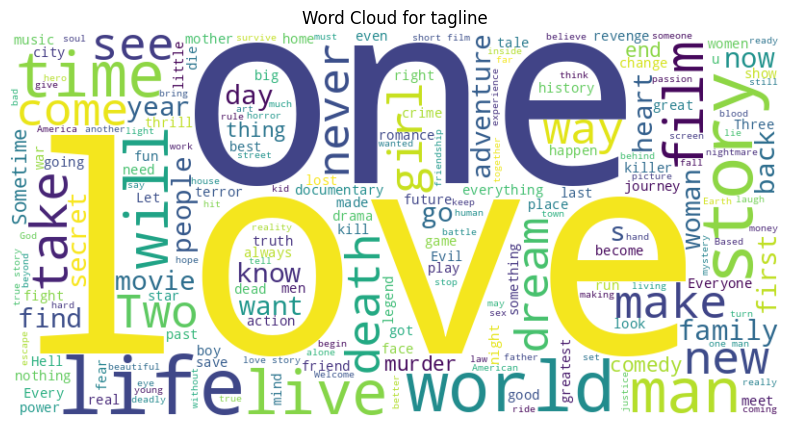


keywords - Word Count Statistics:
count    945749.000000
mean          1.422621
std           3.777638
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         166.000000
Name: keywords, dtype: float64


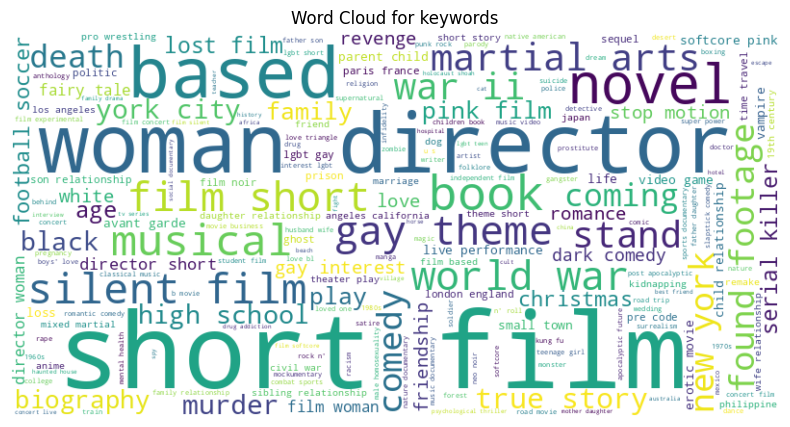

In [60]:
# Analyze Text Data
text_features = ["overview", "tagline", "keywords"]

for feature in text_features:
  word_count = movies[feature].apply(lambda x: len(x.split()))
  print(f"\n{feature} - Word Count Statistics:")
  print(word_count.describe())

  # Generate a Word Cloud for each feature to visualize most common word used
  text = '  '.join(movies[feature].values)
  wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.title(f"Word Cloud for {feature}")
  plt.axis("off")
  plt.show()